# Exercise

Find the original problem description in kaggle here. https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data 

SalePrice is the outcome variable. 
Use a clean version of the data that is treated for null values. https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv
    

- Find number of categorical and continuous variables
- Some observations contain null values in SalesPrice. Drop those records from the analysis 
- Divide the data into training and test data 70/30 ratio with seed =1
- Build a model to estimate SalePrice excluding Id as feature. Calculate R2 and RMSE - Linear regression, Lasso, Ridge, Elastic net
- Take log of the sales price, does the R2 score improves?
- Try model with polynomial terms with degree = 2
- Try PCA - what is required number of principal components to retain 99% of variance?
- Try Feature selection - find 10 most significant features of the dataset. 




In [2]:
import pandas as pd
from sklearn import *
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.__version__

'0.23.4'

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non

In [8]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [12]:
num_features = [k for k in dict(df.dtypes) if df.dtypes[k] in ["float64", "int64"]]
cat_features = [k for k in dict(df.dtypes) if df.dtypes[k] not in ["float64", "int64"]]

In [13]:
len(num_features), len(cat_features)

(38, 42)

In [14]:
del df["Id"]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 no

In [17]:
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

rmse_training:  0.08606817747710854
rmse_test 76190488351.17424
r2_training:  0.9494518297088844
r2_test -3.0715943247509893e+22


Text(0.5, 1.0, 'Residual plot')

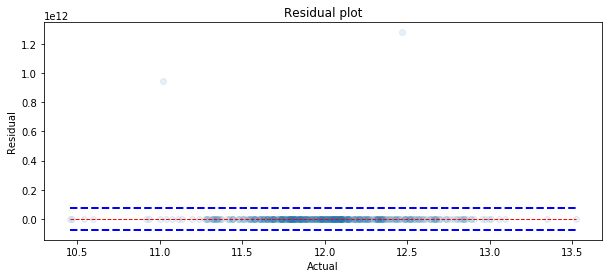

In [46]:
target = "SalesPrice"
X = df.drop(columns=target)

#y = df[target]
y = np.log(df[target])

X_dummy = pd.get_dummies(X, drop_first=True)
features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

residuals_test = y_test_pred - y_test

plt.figure(figsize=(10, 4))
plt.scatter(y_test, residuals_test, alpha = 0.1)
plt.hlines(0, np.min(y_test), np.max(y_test), linestyle = "--", color = "red", linewidth = 1)
residual_std = np.std(residuals_test)
plt.hlines([residual_std, -residual_std], np.min(y_test), np.max(y_test)
                   , linestyle = "--", color = "blue", linewidth = 2)


plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

In [47]:
est = pipe.steps[-1][-1]
thetas = pd.DataFrame({"feature": features, "coeff": est.coef_})
thetas["abs_coeff"] = np.abs(thetas.coeff)
thetas = thetas.sort_values("abs_coeff", ascending = False)
del thetas["abs_coeff"]
thetas

,feature,coeff
15,GrLivArea,1.501695e+11
13,2ndFlrSF,-1.233520e+11
12,1stFlrSF,-1.112376e+11
219,GarageFinish_None,-1.072428e+11
134,Exterior2nd_CBlock,8.844505e+10
120,Exterior1st_CBlock,-8.844505e+10
224,GarageQual_None,7.930425e+10
229,GarageCond_None,7.930320e+10
166,BsmtCond_None,6.149525e+10
218,GarageType_None,-5.136464e+10


rmse_training:  0.12460754170603186
rmse_test 0.15150859029885974
r2_training:  0.8940480673803641
r2_test 0.8785389987905549


Text(0.5, 1.0, 'Residual plot')

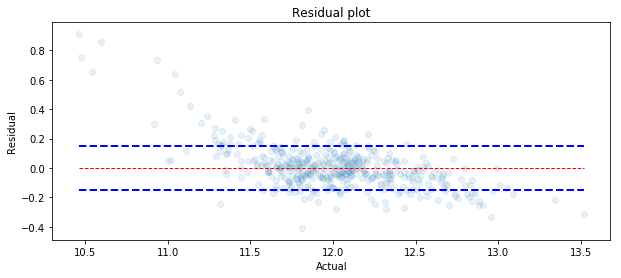

In [48]:
target = "SalesPrice"
X = df.drop(columns=target)

#y = df[target]
y = np.log(df[target])

X_dummy = pd.get_dummies(X, drop_first=True)
features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Lasso(random_state = 1, alpha = 0.01))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

residuals_test = y_test_pred - y_test

plt.figure(figsize=(10, 4))
plt.scatter(y_test, residuals_test, alpha = 0.1)
plt.hlines(0, np.min(y_test), np.max(y_test), linestyle = "--", color = "red", linewidth = 1)
residual_std = np.std(residuals_test)
plt.hlines([residual_std, -residual_std], np.min(y_test), np.max(y_test)
                   , linestyle = "--", color = "blue", linewidth = 2)


plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

In [49]:
est = pipe.steps[-1][-1]
thetas = pd.DataFrame({"feature": features, "coeff": est.coef_})
thetas["abs_coeff"] = np.abs(thetas.coeff)
thetas = thetas.sort_values("abs_coeff", ascending = False)
del thetas["abs_coeff"]
thetas

,feature,coeff
3,OverallQual,0.104135
15,GrLivArea,0.095563
25,GarageCars,0.055896
5,YearBuilt,0.029465
39,MSZoning_RM,-0.026432
4,OverallCond,0.023309
6,YearRemodAdd,0.021713
70,Neighborhood_NridgHt,0.020148
60,Neighborhood_Crawfor,0.019489
16,BsmtFullBath,0.018030


rmse_training:  0.08871007286346148
rmse_test 0.1582604472951229
r2_training:  0.9463010123438526
r2_test 0.8674721599947348


Text(0.5, 1.0, 'Residual plot')

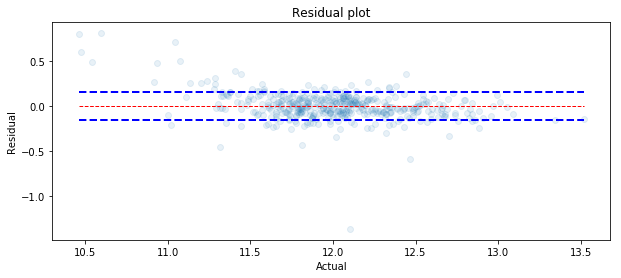

In [55]:
target = "SalesPrice"
X = df.drop(columns=target)

#y = df[target]
y = np.log(df[target])

X_dummy = pd.get_dummies(X, drop_first=True)
features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Ridge(random_state = 1, alpha = 7.))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

residuals_test = y_test_pred - y_test

plt.figure(figsize=(10, 4))
plt.scatter(y_test, residuals_test, alpha = 0.1)
plt.hlines(0, np.min(y_test), np.max(y_test), linestyle = "--", color = "red", linewidth = 1)
residual_std = np.std(residuals_test)
plt.hlines([residual_std, -residual_std], np.min(y_test), np.max(y_test)
                   , linestyle = "--", color = "blue", linewidth = 2)


plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

In [56]:
est = pipe.steps[-1][-1]
thetas = pd.DataFrame({"feature": features, "coeff": est.coef_})
thetas["abs_coeff"] = np.abs(thetas.coeff)
thetas = thetas.sort_values("abs_coeff", ascending = False)
del thetas["abs_coeff"]
thetas

,feature,coeff
110,RoofMatl_CompShg,0.163620
114,RoofMatl_Tar&Grv,0.112199
32,PoolArea,0.083112
116,RoofMatl_WdShngl,0.079761
236,PoolQC_None,0.071249
15,GrLivArea,0.066224
3,OverallQual,0.060864
115,RoofMatl_WdShake,0.055433
38,MSZoning_RL,0.045555
111,RoofMatl_Membran,0.045337


rmse_training:  0.12039004667441772
rmse_test 0.15030644114935773
r2_training:  0.9010988384769547
r2_test 0.8804588234286277


Text(0.5, 1.0, 'Residual plot')

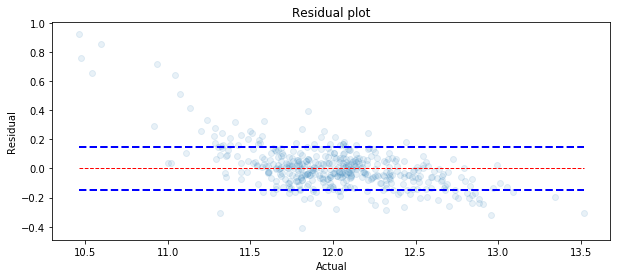

In [59]:
target = "SalesPrice"
X = df.drop(columns=target)

#y = df[target]
y = np.log(df[target])

X_dummy = pd.get_dummies(X, drop_first=True)
features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.ElasticNet(random_state = 1, alpha = 0.01, l1_ratio = 0.8))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

residuals_test = y_test_pred - y_test

plt.figure(figsize=(10, 4))
plt.scatter(y_test, residuals_test, alpha = 0.1)
plt.hlines(0, np.min(y_test), np.max(y_test), linestyle = "--", color = "red", linewidth = 1)
residual_std = np.std(residuals_test)
plt.hlines([residual_std, -residual_std], np.min(y_test), np.max(y_test)
                   , linestyle = "--", color = "blue", linewidth = 2)


plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

n_iter: 93
rmse_training:  0.09821713953365707
rmse_test 0.17555812435247928
r2_training:  0.9400588180964099
r2_test 0.8024169814356017


Text(0.5, 1.0, 'Residual plot')

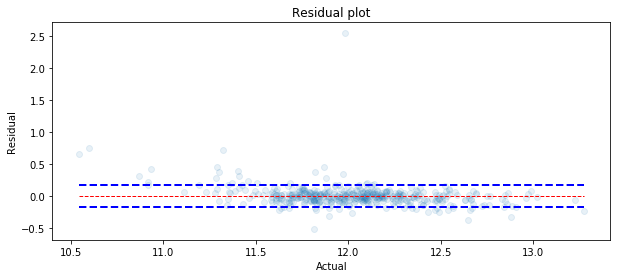

In [76]:
target = "SalesPrice"
X = df.drop(columns=target)

#y = df[target]
y = np.log(df[target])

X_dummy = pd.get_dummies(X, drop_first=True)
features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 76134234)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(random_state = 1, learning_rate = "invscaling"
                        , eta0 = 1e-3
                        , tol = 1e-5
                        , alpha = 0.1
                        , l1_ratio = 0.8
                        , max_iter = 1000))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

est = pipe.steps[-1][-1]
print("n_iter:", est.n_iter_)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

residuals_test = y_test_pred - y_test

plt.figure(figsize=(10, 4))
plt.scatter(y_test, residuals_test, alpha = 0.1)
plt.hlines(0, np.min(y_test), np.max(y_test), linestyle = "--", color = "red", linewidth = 1)
residual_std = np.std(residuals_test)
plt.hlines([residual_std, -residual_std], np.min(y_test), np.max(y_test)
                   , linestyle = "--", color = "blue", linewidth = 2)


plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

In [74]:
est = pipe.steps[-1][-1]
thetas = pd.DataFrame({"feature": features, "coeff": est.coef_})
thetas["abs_coeff"] = np.abs(thetas.coeff)
thetas = thetas.sort_values("abs_coeff", ascending = False)
del thetas["abs_coeff"]
thetas

,feature,coeff
3,OverallQual,0.057451
15,GrLivArea,0.039108
70,Neighborhood_NridgHt,0.030044
12,1stFlrSF,0.029896
25,GarageCars,0.028223
4,OverallCond,0.026394
60,Neighborhood_Crawfor,0.024725
22,TotRmsAbvGrd,0.023349
76,Neighborhood_StoneBr,0.022559
90,Condition2_PosN,-0.022102


In [79]:
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(random_state = 1, learning_rate = "invscaling"
                        , eta0 = 1e-3
                        , tol = 1e-5
                        , alpha = 0.1
                        , l1_ratio = 0.8
                        , max_iter = 1000))
])

scores = model_selection.cross_val_score(pipe, X_dummy.values, y, cv = 5, scoring="r2")

scores, np.mean(scores)

(array([0.89232315, 0.8638099 , 0.87040762, 0.89517216, 0.77426077]),
 0.8591947207889035)

In [69]:
est.n_iter_

1000

In [24]:
np.percentile(residuals_test, [99])

array([0.62953643])

In [25]:
residuals_test[residuals_test>0.62953643]

30     0.944177
462    0.649841
916    0.868189
495    0.913878
968    0.689109
Name: SalesPrice, dtype: float64

rmse_training:  0.1215074491019328
rmse_test 0.16043678540571768
r2_training:  0.8992544125885743
r2_test 0.8638021520732089


Text(0.5, 1.0, 'Residual plot')

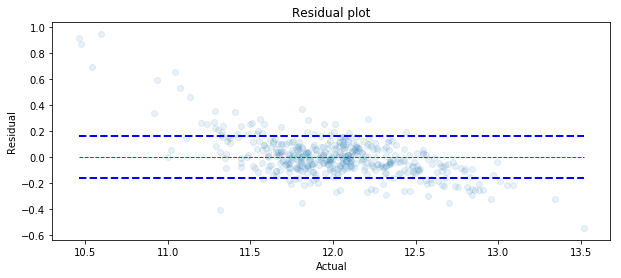

In [23]:
target = "SalesPrice"
X = df.drop(columns=target)

#y = df[target]
y = np.log(df[target])

X_dummy = pd.get_dummies(X, drop_first=True)
features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(learning_rate = "invscaling"
                                      , max_iter = 2000,alpha = 1.0))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

residuals_test = y_test_pred - y_test

plt.figure(figsize=(10, 4))
plt.scatter(y_test, residuals_test, alpha = 0.1)
plt.hlines(0, np.min(y_test), np.max(y_test), linestyle = "--", color = "red", linewidth = 1)
residual_std = np.std(residuals_test)
plt.hlines([residual_std, -residual_std], np.min(y_test), np.max(y_test)
                   , linestyle = "--", color = "blue", linewidth = 2)


plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

In [80]:
np.linspace(0.05, 0.15, 10)

array([0.05      , 0.06111111, 0.07222222, 0.08333333, 0.09444444,
       0.10555556, 0.11666667, 0.12777778, 0.13888889, 0.15      ])

In [82]:
%%time

target = "SalesPrice"
X = df.drop(columns=target)

#y = df[target]
y = np.log(df[target])

X_dummy = pd.get_dummies(X, drop_first=True)
features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(random_state = 1, learning_rate = "invscaling"
                        , eta0 = 1e-3
                        , tol = 1e-5
                        , alpha = 0.1
                        , l1_ratio = 0.8
                        , max_iter = 1000))
])

param_grid = {
    "est__alpha": np.linspace(0.05, 0.15, 10),
    "est__l1_ratio": np.linspace(0.0,1.0, 10), 
}

gsearch = model_selection.GridSearchCV(pipe,param_grid, scoring="r2", cv = 5)
gsearch.fit(X_dummy.values, y)


CPU times: user 4min 8s, sys: 271 ms, total: 4min 8s
Wall time: 41.5 s


In [83]:
gsearch.best_params_

{'est__alpha': 0.15, 'est__l1_ratio': 0.0}

In [84]:
gsearch.best_score_

0.8614107184111044

In [85]:
gsearch.best_estimator_

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', SGDRegressor(alpha=0.15, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.0,
   ...dom_state=1, shuffle=True, tol=1e-05, validation_fraction=0.1,
       verbose=0, warm_start=False))])

In [86]:
import pickle

In [87]:
with open("model.pkl", "wb") as f:
    pickle.dump(gsearch, f)

In [88]:
!ls -l

total 3352
-rw-r--r--  1 abasar  staff   60897 Jan  7 12:50 Day 1 - exercise - top 10 movies.ipynb
-rw-r--r--  1 abasar  staff  304884 Jan  7 11:13 Day 1 - pandas dataframe.ipynb
-rw-r--r--  1 abasar  staff    6447 Jan  8 09:06 Day 1 - regression-Copy1.ipynb
-rw-r--r--  1 abasar  staff   67557 Jan  8 12:34 Day 1 - regression.ipynb
-rw-r--r--  1 abasar  staff  197981 Jan  7 15:06 Day 1 - visualization.ipynb
-rw-r--r--  1 abasar  staff  280906 Jan  8 16:15 Day 2 - Kaggle house price prediction.ipynb
-rw-r--r--  1 abasar  staff  711406 Jan  8 12:42 Day 2 - regression problem exercise.ipynb
drwxr-xr-x  3 abasar  staff      96 Dec 10 11:58 __pycache__
-rw-r--r--@ 1 abasar  staff   24417 Jan  7 14:12 insurance.jpg
-rw-r--r--@ 1 abasar  staff   12596 Jan  7 14:12 insurance.pdf
-rw-r--r--  1 abasar  staff   32485 Jan  8 16:16 model.pkl


In [90]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

In [92]:
model.predict(X_test.iloc[5:6, :])

array([12.71671464])

In [94]:
y_test.values[5]

12.693498620467778